### Import modules

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import the dataset and inspect

In [24]:
df=pd.read_csv("loan_default.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

there's no null entries, so no need to fill missing values

In [25]:
df.shape

(255347, 18)

We have 18 features and 255347 rows

In [26]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [27]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [28]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


#### drop the "LoanID" column because it's only an identifier

In [29]:
df.drop("LoanID",axis=1,inplace=True)

#### inspect the distribution of loan default

In [30]:
df["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

we can see that it's an imbalanced dataset. the ratio of defaulted : not defaulted is around 9 : 1

In [31]:
# check if there are any duplicates
df.duplicated().sum()

0

### Data Visualization

#### extract numerical features

In [32]:
col_num=["Age","Income","LoanAmount","CreditScore","MonthsEmployed","NumCreditLines","InterestRate","LoanTerm","DTIRatio","Default"]
df_num=df[col_num]

examine correlation of numerical features to default

<Axes: >

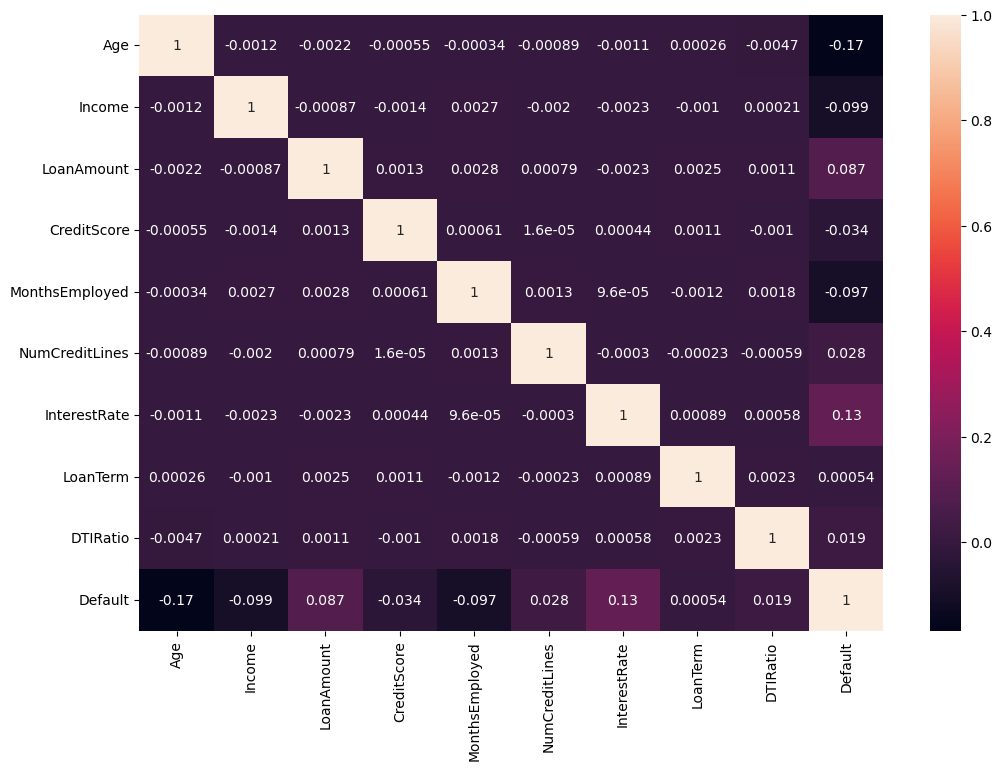

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(),annot=True)

Features with strongest positive correlation:
interest rate, loan amount, number of credit lines, default-to-income ratio.
Features with strongest negative correlation:
age, income, months employed, credit score
(which makes sense intuitively)

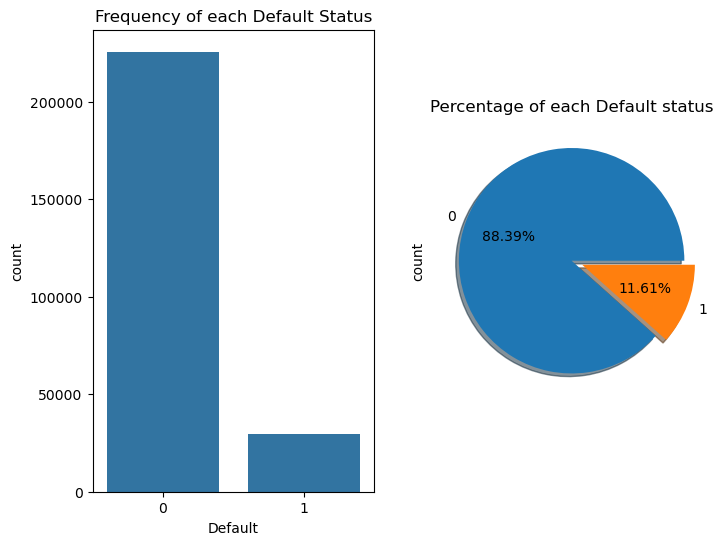

In [34]:

fig, axs = plt.subplots(1,2,figsize=(8,6))
sns.countplot(x='Default',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Default Status")
df['Default'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True, explode = (0, 0.1,), autopct='%1.2f%%' )
axs[1].set_title("Percentage of each Default status")
plt.show()

Text(0.5, 1.0, 'Loan Amount Distribution by Default Status')

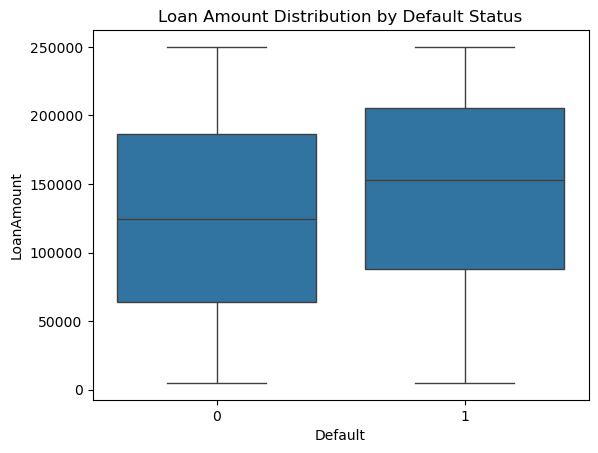

In [35]:
sns.boxplot(data=df, x='Default', y='LoanAmount')
plt.title('Loan Amount Distribution by Default Status')

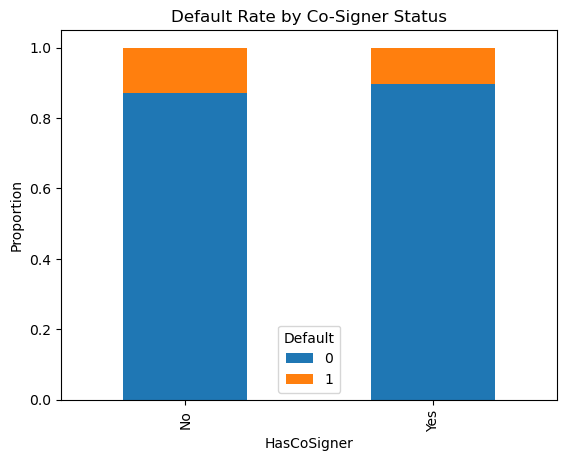

In [36]:
cross_tab = pd.crosstab(df['HasCoSigner'], df['Default'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.title('Default Rate by Co-Signer Status')
plt.ylabel('Proportion')
plt.legend(title='Default')

### Data Preprocessing

#### encode binary categorical features

In [37]:
df["HasMortgage"]=df["HasMortgage"].map({"Yes":1,"No":0})
df["HasDependents"]=df["HasDependents"].map({"Yes":1,"No":0})
df["HasCoSigner"]=df["HasCoSigner"].map({"Yes":1,"No":0})
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


#### examine non-binary categorical features

In [38]:
df['EmploymentType'].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [39]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [40]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [41]:
df['LoanPurpose'].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

use one-hot encoding to encode categorical features

In [42]:
# employment type
df['IsPartTime']=(df['EmploymentType'] == 'Part-time').astype(int)
df['IsUnemployed']=(df['EmploymentType'] == 'Unemployed').astype(int)
df['IsSelfEmployed']=(df['EmploymentType'] == 'Self-employed').astype(int)
df['IsFullTime']=(df['EmploymentType'] == 'Full-time').astype(int)
# education
df['IsBachelors']=(df['Education']=="Bachelor's").astype(int)
df['IsHighSchol']=(df['Education']=="High School").astype(int)
df['IsMasters']=(df['Education']=="Master's").astype(int)
df['IsPhD']=(df['Education']=="PhD").astype(int)
# marital status
df['IsMarried']=(df['MaritalStatus'] == 'Married').astype(int)
df['IsDivorced']=(df['MaritalStatus'] == 'Divorced').astype(int)
df['IsSingle']=(df['MaritalStatus'] == 'Single').astype(int)
# loan purpose
df['IsBusiness']=(df['LoanPurpose'] == 'Business').astype(int)
df['IsHome']=(df['LoanPurpose'] == 'Home').astype(int)
df['IsEducation']=(df['LoanPurpose'] == 'Education').astype(int)
df['IsOther']=(df['LoanPurpose'] == 'Other').astype(int)
df['IsAuto']=(df['LoanPurpose'] == 'Auto').astype(int)
# drop the original columns
df=df.drop(['EmploymentType','Education','MaritalStatus','LoanPurpose'],axis=1)

print out preprocessed head

In [43]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,IsMasters,IsPhD,IsMarried,IsDivorced,IsSingle,IsBusiness,IsHome,IsEducation,IsOther,IsAuto
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,1,0,0,0,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,1,0,1,0,0,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,0,1,0,0,0,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,1,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,0,0,1,0,0,0,0,0,1


save preprocessed dataset to csv
(always leave this as the last step)

In [ ]:
# the complete dataset
df.to_csv("loan_default_preprocessed.csv",index=False)
# only numerical features
df_num.to_csv("loan_default_numeric.csv")
# only categorical features
col_num.remove('Default')
df_categorical=df.drop(col_num,axis=1)
df_categorical.head()
df_categorical.to_csv("loan_default_categorical.csv")

,HasMortgage,HasDependents,HasCoSigner,Default,IsPartTime,IsUnemployed,IsSelfEmployed,IsFullTime,IsBachelors,IsHighSchol,IsMasters,IsPhD,IsMarried,IsDivorced,IsSingle,IsBusiness,IsHome,IsEducation,IsOther,IsAuto
0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
